# 2.0.0 Generating the Schapiro Graph

Place to work on generating the graph laid out in the [Shapiro paper](https://www.nature.com/articles/nn.3331#Sec16).

## Jupyter Extensions

Load [watermark](https://github.com/rasbt/watermark) to see the state of the machine and environment that's running the notebook. To make sense of the options, take a look at the [usage](https://github.com/rasbt/watermark#usage) section of the readme.

In [1]:
# Load `watermark` extension
%load_ext watermark
# Display the status of the machine and packages. Add more as necessary.
%watermark -v -n -m -g -b -t -p numpy,matplotlib,seaborn,networkx

Sun Aug 16 2020 12:01:25 

CPython 3.8.5
IPython 7.16.1

numpy 1.19.1
matplotlib 3.2.2
seaborn 0.10.1
networkx 2.4

compiler   : GCC 7.3.0
system     : Linux
release    : 5.4.0-42-generic
machine    : x86_64
processor  : x86_64
CPU cores  : 4
interpreter: 64bit
Git hash   : 0ac8b9953ff1689a2e4dd4530da1824e3d86416a
Git branch : master


Load [autoreload](https://ipython.org/ipython-doc/3/config/extensions/autoreload.html) which will always reload modules marked with `%aimport`.

This behavior can be inverted by running `autoreload 2` which will set everything to be auto-reloaded *except* for modules marked with `%aimport`.

In [2]:
# Load `autoreload` extension
%load_ext autoreload
# Set autoreload behavior
%autoreload 1

Load `matplotlib` in one of the more `jupyter`-friendly [rich-output modes](https://ipython.readthedocs.io/en/stable/interactive/plotting.html). Some options (that may or may not have worked) are `inline`, `notebook`, and `gtk`.

In [3]:
# Set the matplotlib mode
%matplotlib inline

## Imports

In [4]:
import networkx as nx
import matplotlib.pyplot as plt

## Visualizing Graphs

In [5]:
G = nx.petersen_graph()

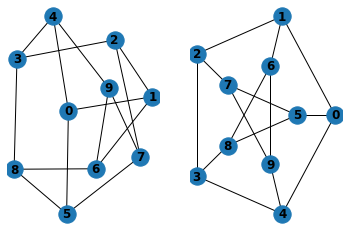

In [6]:
plt.subplot(121)
nx.draw(G, with_labels=True, font_weight='bold')
plt.subplot(122)
nx.draw_shell(G, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')

## Adding Nodes

In [7]:
G = nx.Graph()

In [8]:
G.add_node(1)

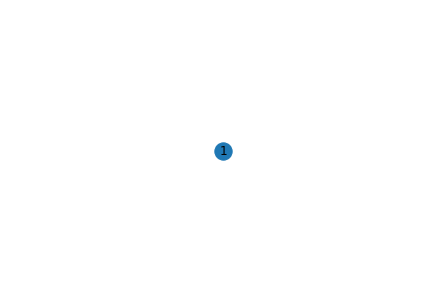

In [9]:
nx.draw(G, with_labels=True)

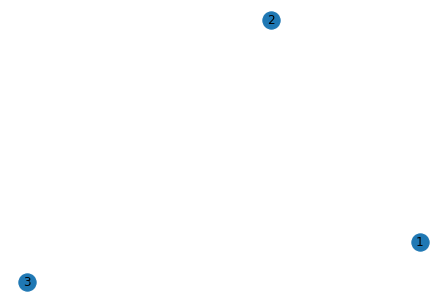

In [10]:
G.add_nodes_from([2,3])
nx.draw(G, with_labels=True)

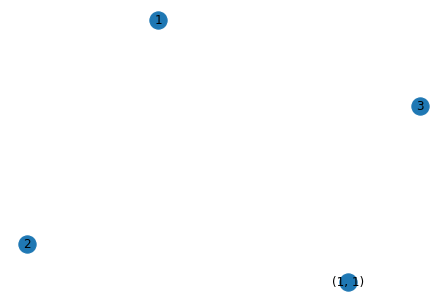

In [11]:
G.add_node((1,1))
nx.draw(G, with_labels=True)

## Removing Nodes

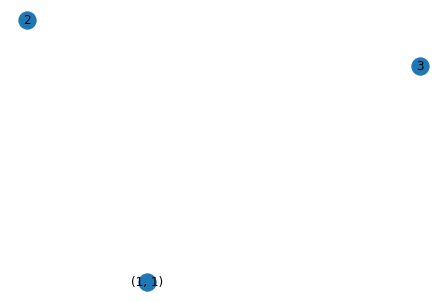

In [12]:
G.remove_node(1)
nx.draw(G, with_labels=True)

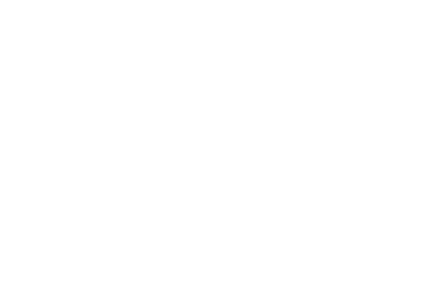

In [13]:
G.remove_nodes_from(list(G.nodes))
nx.draw(G, with_labels=True)

## Edges

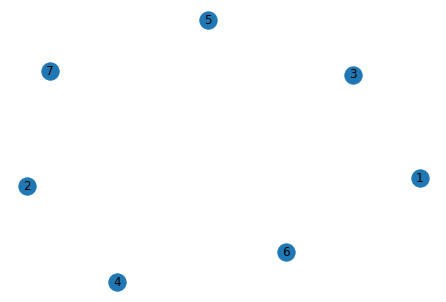

In [14]:
G.add_nodes_from([1,2,3,4,5,6,7])
nx.draw(G, with_labels=True)

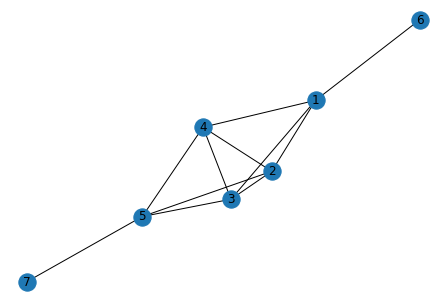

In [15]:
G.add_edges_from((
    (1,2), (1,3), (1,4), (1,6),
    (2,3), (2,4), (2,5),
    (3,4), (3,5),
    (4,5),
    (5,7),
))
nx.draw(G, with_labels=True)

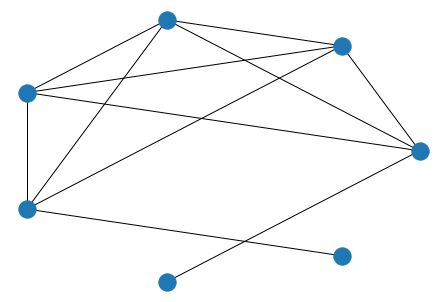

In [16]:
nx.draw_circular(G, with_labesl=True)

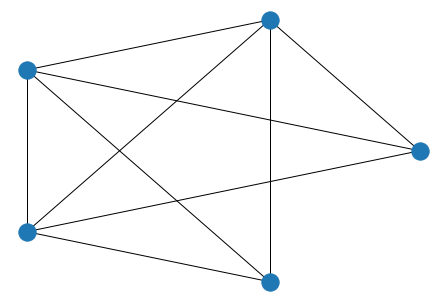

In [17]:
G.remove_nodes_from([6,7])
nx.draw_circular(G)

## The Shapiro Graph

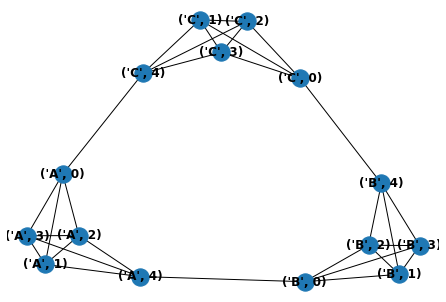

In [18]:
#def graph_pentagon(label='A'):

def graph_pentagon(label='A', weight=1):
    G = nx.Graph()
    G.add_nodes_from(zip([label]*5, range(5)))

    nodes_list = list(G.nodes)
    border_nodes = [nodes_list[0], nodes_list[-1]]
    for i, node_1 in enumerate(nodes_list[:-1]):
        for node_2 in nodes_list[i+1:]:
            if node_1 in border_nodes and node_2 in border_nodes: 
                continue
            G.add_edge(node_1, node_2, weight=weight)
    return G

def graph_shapiro(labels='ABC', weight=1):
    G = nx.Graph()

    for label in labels:
        pentagon = graph_pentagon(label)
        G.add_nodes_from(pentagon)
        G.add_edges_from(pentagon.edges, weight=weight)

    for i, label in enumerate(labels[:-1]):
        G.add_edge((label,4), (labels[i+1],0), weight=weight)
        G.add_edge((label,0), (labels[i-1],4), weight=weight)

    return G

G = graph_shapiro()
nx.draw(G, with_labels=True, font_weight='bold')

## Random Walk

### Random Step

In [19]:
G.nodes

NodeView((('A', 0), ('A', 1), ('A', 2), ('A', 3), ('A', 4), ('B', 0), ('B', 1), ('B', 2), ('B', 3), ('B', 4), ('C', 0), ('C', 1), ('C', 2), ('C', 3), ('C', 4)))

In [29]:
a = G[('A',0)]

In [21]:
a.

Type:        AtlasView
String form: {('A', 1): {'weight': 1}, ('A', 2): {'weight': 1}, ('A', 3): {'weight': 1}, ('C', 4): {'weight': 1}}
Length:      4
File:        ~/miniconda3/envs/g2/lib/python3.8/site-packages/networkx/classes/coreviews.py
Docstring:  
An AtlasView is a Read-only Mapping of Mappings.

It is a View into a dict-of-dict data structure.
The inner level of dict is read-write. But the
outer level is read-only.

See Also
AdjacencyView - View into dict-of-dict-of-dict
MultiAdjacencyView - View into dict-of-dict-of-dict-of-dict


In [22]:
nx.utils.weighted_choice?

Signature: nx.utils.weighted_choice(mapping, seed=None)
Docstring:
Returns a single element from a weighted sample.

The input is a dictionary of items with weights as values.
File:      ~/miniconda3/envs/g2/lib/python3.8/site-packages/networkx/utils/random_sequence.py
Type:      function


In [23]:
nx.utils.weighted_choice(a)

TypeError: unsupported operand type(s) for +: 'int' and 'dict'

In [24]:
@nx.utils.py_random_state(1)
def weighted_sample(node, seed=None):
    """Slightly modified version of ``nx.utils.weighted_choice`` to handle views

    Parameters
    ----------
    node : AtlasView
        A view of a node, containing all its neighbors
        
    Returns
    -------
    step : tuple
        Identifier for the sampled node
    """
    # use roulette method
    rnd = seed.random() * sum([n['weight'] for n in node.values()])
    for k, w in node.items():
        rnd -= w['weight']
        if rnd < 0:
            return k

weighted_sample(a)

('C', 4)

In [28]:
a

array(1)

In [30]:
many_samples = [weighted_sample(a) for _ in range(100000)]

In [33]:
np.unique(many_samples)

array(['1', '2', '3', '4', 'A', 'C'], dtype='<U1')

In [35]:
for a_element in a.keys():
    print(many_samples.count(a_element))

25071
25198
24777
24954


### Full Random Walk

In [157]:
def random_walk(G, source=None, steps=None):
    # Choose a start position
    source = source or list(G.nodes)[np.random.choice(len(G.nodes))]
    assert source in list(G.nodes)
    
    while steps != 0:
        position = weighted_sample(G[source])
        yield source, position
        source = position
        if isinstance(steps, (int, float)):
            steps -= 1
            
walk = random_walk(G)

In [158]:
for i in range(15):
    print(next(walk))

(('B', 2), ('B', 0))
(('B', 0), ('B', 3))
(('B', 3), ('B', 0))
(('B', 0), ('B', 3))
(('B', 3), ('B', 4))
(('B', 4), ('C', 0))
(('C', 0), ('B', 4))
(('B', 4), ('B', 1))
(('B', 1), ('B', 4))
(('B', 4), ('B', 3))
(('B', 3), ('B', 0))
(('B', 0), ('B', 2))
(('B', 2), ('B', 3))
(('B', 3), ('B', 0))
(('B', 0), ('B', 2))


In [83]:
all_nodes = [list(G.nodes)[np.random.choice(len(G.nodes))] for _ in range(1000000)]
for node in set(all_nodes):
    print(node, all_nodes.count(node))

('B', 0) 66831
('A', 2) 67028
('B', 3) 66882
('C', 2) 67034
('B', 2) 66469
('A', 3) 66696
('C', 1) 66855
('A', 1) 66958
('C', 4) 66848
('B', 1) 66349
('A', 4) 66060
('B', 4) 66741
('A', 0) 66304
('C', 3) 66392
('C', 0) 66553


## Eulerian Path (Walk)

In [159]:
euler = nx.algorithms.euler.eulerian_path(G, source=list(G.nodes)[np.random.choice(len(G.nodes))])

In [160]:
for i in range(15):
    print(next(walk))

(('B', 2), ('B', 3))
(('B', 3), ('B', 2))
(('B', 2), ('B', 3))
(('B', 3), ('B', 2))
(('B', 2), ('B', 4))
(('B', 4), ('C', 0))
(('C', 0), ('B', 4))
(('B', 4), ('C', 0))
(('C', 0), ('C', 2))
(('C', 2), ('C', 4))
(('C', 4), ('C', 3))
(('C', 3), ('C', 4))
(('C', 4), ('C', 1))
(('C', 1), ('C', 2))
(('C', 2), ('C', 0))
